In [ ]:
#Install needed Mueller Matrix Processing Library, you may need to change this depending on how you are running Python
#useful info about what this library can do at- https://pages.nist.gov/pySCATMECH/UsingMueller.html
import sys
!{sys.executable} -m pip install pySCATMECH

In [1]:
#Import libraries being used
from pySCATMECH.mueller import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as patches
import IPython
import os
import glob
import spectral.io.envi as envi
import cv2
from tkinter import *
import PIL
import scipy.ndimage as ndimage
from datetime import datetime
from PIL import ImageTk, Image, ImageDraw
from scipy.ndimage import gaussian_filter
#This helps to move past poorly behaved data-
np.seterr(all='ignore')

#DIY color map from image- will need to update the following path-
image = Image.open(r"C:\Users\justinamb\Desktop\lilcolormap2.png")
cmapdata = np.asarray(image)
#cmapdata=np.fliplr(cmapdata)
print(cmapdata.shape)
newmap=cmapdata[20,:,:]/256
mymap2 = mcolors.ListedColormap(newmap)


#Color map creation-
def symmetrical_colormap(cmap, new_name = None ):
    # get the colormap
    #cmap = newcmp
    if not new_name:
        new_name = "map17"  # ex: 'sym_Blues'
    
    # this defined the roughness of the colormap, 128 fine
    n= 128 
    
    # get the list of color from colormap
    colors_r = cmap(np.linspace(0, 1, n))    # take the standard colormap # 'right-part'
    colors_l = colors_r[::-1]                # take the first list of color and flip the order # "left-part"

    # combine them and build a new colormap
    colors = np.vstack((colors_l, colors_r))
    mymap = mcolors.LinearSegmentedColormap.from_list(new_name, colors)

    return mymap

(71, 623, 4)


# Mueller Matrix Importing and Decomposition

C:\Users\justinamb\Desktop\pli119\20230119_1557_05xM_FT_233_brainstem_1
Loading text files to image data for wavelength analyzed_405_MES


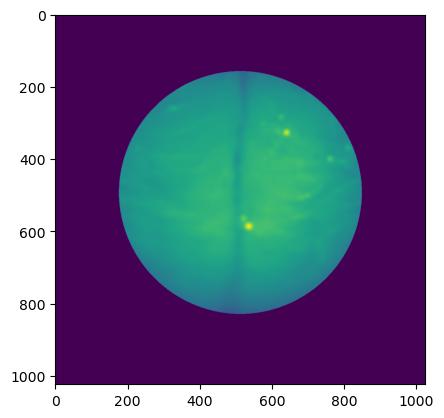

Performing Lu-Chipman decomposition for each pixel in the image. This is gonna be a sec. :)


KeyboardInterrupt: 

In [4]:
#Set the folderpath to where your MM folders are-
folderpath=glob.glob(os.path.join(r"C:\Users\justinamb\Desktop\pli119\20230119_1557_05xM_FT_233_brainstem_1"))[0]
print(folderpath)
#The code is set up to save the results to the same folder as where your mueller matrix files are.
#This part of the code takes a long time.
deplist=[]
cdlist=[]
dialist=[]
danglist=[]
ranglist=[]
retlist=[]
linretlist=[]
optrotlist=[]
pollist=[]

wavelengthlist=[405, 442, 473, 543, 632]
for i in wavelengthlist:
    wavelength=i
    wavelengthforpath="analyzed_"+str(wavelength)+"_MES"
    #This allows the code to skip over wavelengths that are not present-
    ims = glob.glob(os.path.join(folderpath, wavelengthforpath, "*.txt"))
    if not len(ims):
        print("No images are found for wavelength %s" %wavelengthforpath)
        deplist.append([0])
        cdlist.append([0])
        dialist.append([0])
        danglist.append([0])
        ranglist.append([0])
        retlist.append([0])
        linretlist.append([0])
        optrotlist.append([0])
        pollist.append([0])
        continue
    else:
        #Here the Mueller matrix text files are loaded and nan's are turned into zeros.
        print("Loading text files to image data for wavelength %s" %wavelengthforpath)
        path11=os.path.join(folderpath, wavelengthforpath, "m11.txt")
        M011=np.loadtxt(path11)
        M11 = np.where(np.isnan(M011), 0, M011)
        path12=os.path.join(folderpath, wavelengthforpath, "m12.txt")
        M012=np.loadtxt(path12)
        M12 = np.where(np.isnan(M012), 0, M012)
        path13=os.path.join(folderpath, wavelengthforpath, "m13.txt")
        M013=np.loadtxt(path13)
        M13 = np.where(np.isnan(M013), 0, M013)
        path14=os.path.join(folderpath, wavelengthforpath, "m14.txt")
        M014=np.loadtxt(path14)
        M14 = np.where(np.isnan(M014), 0, M014)
        path21=os.path.join(folderpath, wavelengthforpath, "m21.txt")
        M021=np.loadtxt(path21)
        M21 = np.where(np.isnan(M021), 0, M021)
        path22=os.path.join(folderpath, wavelengthforpath, "m22.txt")
        M022=np.loadtxt(path22)
        M22 = np.where(np.isnan(M022), 0, M022)
        path23=os.path.join(folderpath, wavelengthforpath, "m23.txt")
        M023=np.loadtxt(path23)
        M23= np.where(np.isnan(M023), 0, M023)
        path24=os.path.join(folderpath, wavelengthforpath, "m24.txt")
        M024=np.loadtxt(path24)
        M24 = np.where(np.isnan(M024), 0, M024)
        path31=os.path.join(folderpath, wavelengthforpath, "m31.txt")
        M031=np.loadtxt(path31)
        M31 = np.where(np.isnan(M031), 0, M031)
        path32=os.path.join(folderpath, wavelengthforpath, "m32.txt")
        M032=np.loadtxt(path32)
        M32 = np.where(np.isnan(M032), 0, M032)
        path33=os.path.join(folderpath, wavelengthforpath, "m33.txt")
        M033=np.loadtxt(path33)
        M33 = np.where(np.isnan(M033), 0, M033)
        path34=os.path.join(folderpath, wavelengthforpath, "m34.txt")
        M034=np.loadtxt(path34)
        M34 = np.where(np.isnan(M034), 0, M034)
        path41=os.path.join(folderpath, wavelengthforpath, "m41.txt")
        M041=np.loadtxt(path41)
        M41 = np.where(np.isnan(M041), 0, M041)
        path42=os.path.join(folderpath, wavelengthforpath, "m42.txt")
        M042=np.loadtxt(path42)
        M42 = np.where(np.isnan(M042), 0, M042)
        path43=os.path.join(folderpath, wavelengthforpath, "m43.txt")
        M043=np.loadtxt(path43)
        M43 = np.where(np.isnan(M043), 0, M043)
        path44=os.path.join(folderpath, wavelengthforpath, "m44.txt")
        M044=np.loadtxt(path44)
        M44 = np.where(np.isnan(M044), 0, M044)

        #Emply matricies are established as placeholders for data
        diatten=np.zeros(M11.shape)
        depo=np.zeros(M11.shape)
        circulardi=np.zeros(M11.shape)
        diangle=np.zeros(M11.shape)
        rang=np.zeros(M11.shape)
        ret=np.zeros(M11.shape)
        linret=np.zeros(M11.shape)
        optrot=np.zeros(M11.shape)
        pol=np.zeros(M11.shape)

        plt.imshow(M11)
        plt.show()
        
        print("Performing Lu-Chipman decomposition for each pixel in the image. This is gonna be a sec. :)")
        #For each pixel in the image
        for i, row in enumerate(M11):
            for j, col in enumerate(M11[i]):
                

                #A matrix is put together from the imported text files.
                MM=np.array([[M11[i,j], M12[i,j],M13[i,j],M14[i,j]],[M21[i,j],M22[i,j],M23[i,j],M24[i,j]],[M31[i,j],M32[i,j],M33[i,j],M34[i,j]],[M41[i,j],M42[i,j],M43[i,j],M44[i,j]]])
                #For potential debugging-
                #MM = np.where(MM < MM[0, 0], MM, MM[0, 0])
                #The matrix is declared to be a Mueller matrix
                Mule=MuellerMatrix(MM)
                
                   # print(np.round(Mule,2))
                try:
                    #Parameters are able to be found using function from pySCATMech lib.
                    parametersM = CharacterizedMueller(Mule)
                    Depol=parametersM.DepolarizationCoefficient
                    Di=parametersM.Diattenuation
                    CircDi=parametersM.CircularDiattenuation
                    Diang=parametersM.DiattenuationAngle
                    ranga=parametersM.RetardanceAngle
                    reta=parametersM.Retardance
                    linreta=parametersM.LinearRetardance
                    optrota=parametersM.OpticalRotation
                    pola=parametersM.Polarizance
                #If the matrix is not valid this will allow you to bypass and/ or debug
                except ValueError:
                    # print(i,j)
                    Depol=0
                    Di=0
                    CircDi=0
                    Diang=0
                    ranga=0
                    reta=0
                    linreta=0
                    optrota=0
                    pola=0
                #Calculated parameters are set to matricies.
                depo[i,j]=Depol
                diatten[i,j]=Di
                circulardi[i,j]=CircDi
                diangle[i,j]=Diang
                rang[i,j]=ranga
                ret[i,j]=reta
                linret[i,j]=linreta
                optrot[i,j]=optrota
                pol[i,j]=pola
    #Resulting Datasets are rotated to stay consistent with other ROI code-
        deplist.append(depo)
        dialist.append(diatten)
        danglist.append(diangle)
        ranglist.append(rang)
        retlist.append(ret)
        cdlist.append(circulardi)
        linretlist.append(linret)
        optrotlist.append(optrot)
        pollist.append(pol)

print('Saving Output!')        
# Folder called polardecomp is created within the same folder as all the mueller matrix folders-
datapath = os.path.join(folderpath, "polardecomp") 
os.makedirs(datapath)

#Data is saved as compressed arrays-
for i in range(5):
    wave=wavelengthlist[i]
    np.savez_compressed(os.path.join(datapath,str(wave)), retang=ranglist[i], diatten=dialist[i], depol=deplist[i], diang=danglist[i], ret=retlist[i], cdia=cdlist[i], linret=linretlist[i], optrot=optrotlist[i], polar=pollist[i]) 


# Data Visualization-

In [5]:
#Can load in decomposed data so you don't need to run decomposition each time-
data_folder=r"C:\Users\justinamb\Desktop\pli119\20230119_1557_05xM_FT_233_brainstem_1"
decomp_data_path=os.path.join(data_folder, "polardecomp")

#wavelist can be changed if not all Mueller Decomps worked-
wavelist=[405, 442, 473, 543, 632]

waveopts=[405, 442, 473, 543, 632]
    
filler= np.array([0, 0, 0, 0])
deplist=[]
cdlist=[]
dialist=[]
danglist=[]
ranglist=[]
retlist=[]
linretlist=[]
optrotlist=[]
pollist=[]

for i in range(len(waveopts)):
    if waveopts[i] in wavelist:
        wave=waveopts[i]
        wavefile=np.load(os.path.join(decomp_data_path, str(wave)+".npz"))
        ranglist.append(wavefile['retang'])
        dialist.append(wavefile['diatten'])
        deplist.append(wavefile['depol'])
        danglist.append(wavefile['diang'])
        retlist.append(wavefile['ret']) 
        cdlist.append(wavefile['cdia'])
        linretlist.append(wavefile['linret'])
        optrotlist.append(wavefile['optrot'])
        pollist.append(wavefile['polar'])
            
    else: 
        diattenuation.append(filler)
        depolarization.append(filler)
        circ_diatten.append(filler)
        diat_angle.append(filler)
        ret_angle.append(filler) 
        retardance.append(filler) 
        linear_ret.append(filler) 
        optical_rotation.append(filler) 
        polarizance.append(filler)
            

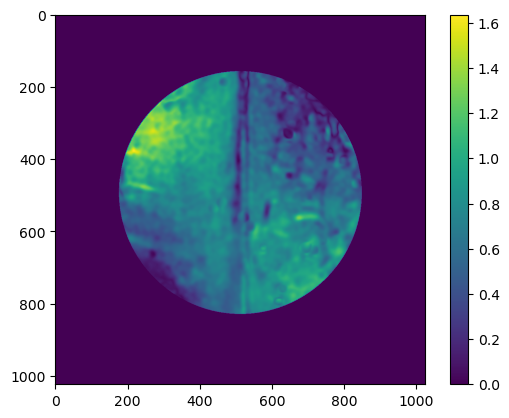

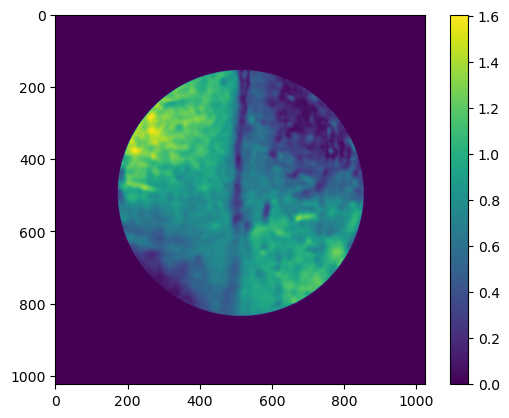

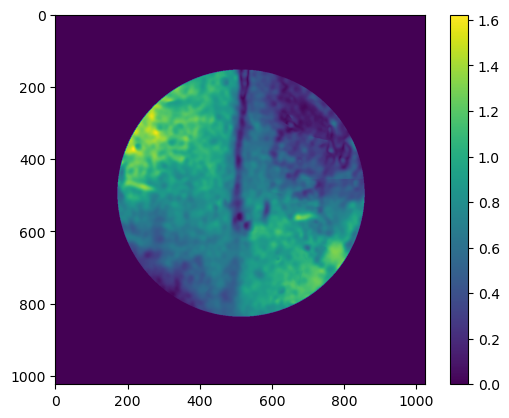

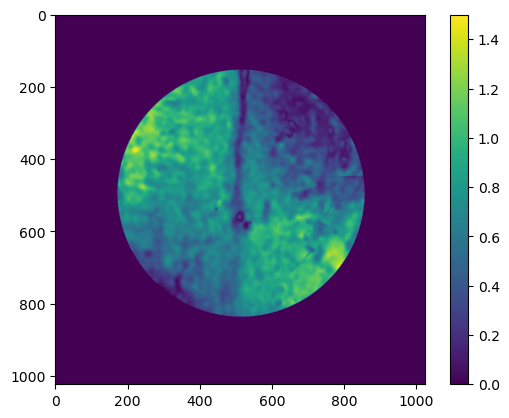

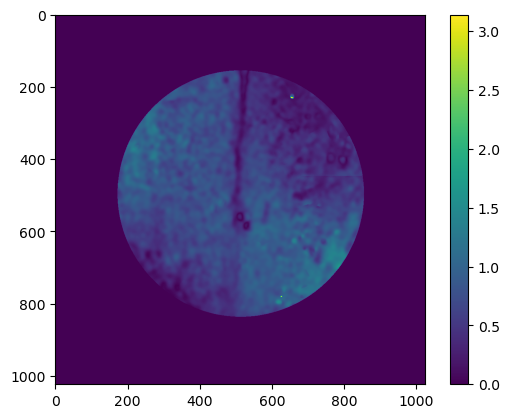

In [6]:
#Individual parameters across different wavelengths-
for i in range(5):
    dataup=retlist[i]
    f=plt.imshow(dataup)
    cbar=plt.colorbar(f)
    plt.show()

<Figure size 40000x40000 with 0 Axes>

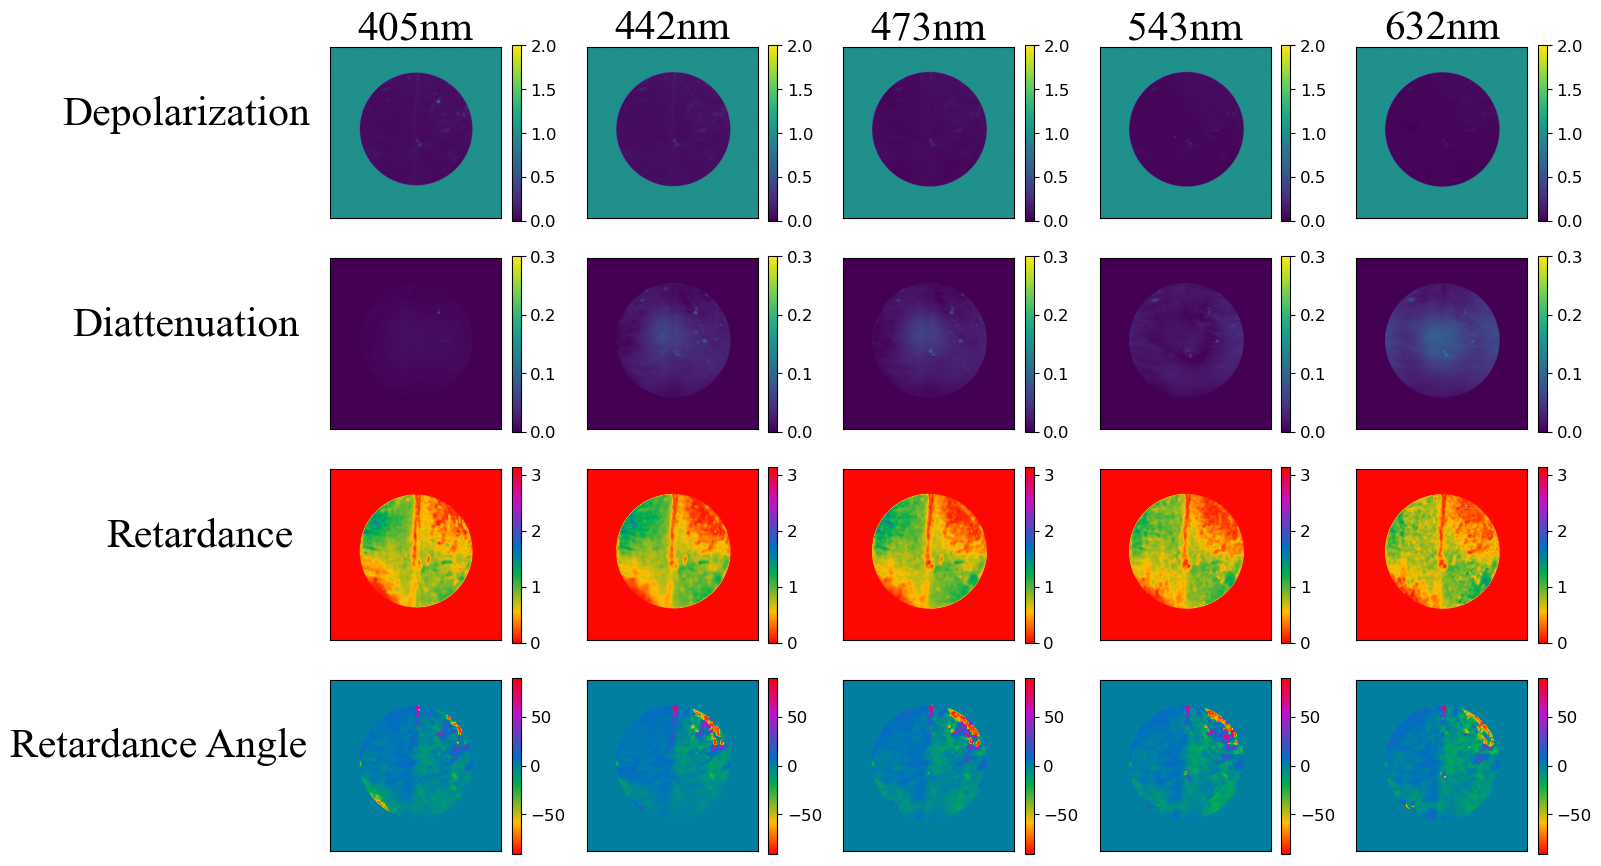

In [7]:
#Big Plot with 4 main polarization properties across 5 Wavelengths

#Shows resulting matricies
plt.figure(figsize=(20,20), dpi=2000)
fig, axs = plt.subplots(4,5)
fig.set_size_inches(16, 10.5)
csfont = {'fontname':'Times New Roman'}

axs[0, 0].set_title('405nm', fontsize = 30, **csfont)
axs[0, 1].set_title('442nm', fontsize = 30,**csfont)
axs[0, 2].set_title('473nm', fontsize = 30,**csfont)
axs[0, 3].set_title('543nm', fontsize = 30,**csfont)
axs[0, 4].set_title('632nm', fontsize = 30,**csfont)

#Set titles of parameters you are interested in looking at:
axs[0,0].set_ylabel('Depolarization',labelpad=100, rotation=0, fontsize = 30,**csfont)
axs[1,0].set_ylabel('Diattenuation', labelpad=100, rotation=0, fontsize = 30,**csfont)
axs[2,0].set_ylabel('Retardance', labelpad=90, rotation=0, fontsize = 30,**csfont)
axs[3,0].set_ylabel('Retardance Angle', labelpad=120, rotation=0, fontsize = 30,**csfont)


for i in range(5):
    if deplist[i].shape[0] < 1000:
        img1 = np.zeros((1024,1024))
        img2 = np.zeros((1024,1024))       
        img3 = np.zeros((1024,1024))
        img4 = np.zeros((1024,1024))
#Set parameters you are interested in looking at:   
    else:
        img1 = deplist[i]
        img2 = dialist[i]        
        img3 = retlist[i]
        img4 = ranglist[i]
        
    axs[0,i].set_yticklabels([])
    axs[0,i].set_xticklabels([])
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    c1 = axs[0,i].imshow(img1,vmin=0,vmax=2)  
    cbar=plt.colorbar(c1,ax=axs[0,i])
    #axs[0,i].imshow(circle)
    tick_font_size = 12
    cbar.ax.tick_params(labelsize=tick_font_size)
        
    axs[1,i].set_yticklabels([])
    axs[1,i].set_xticklabels([])
    axs[1,i].set_xticks([])
    axs[1,i].set_yticks([])
    c2 = axs[1,i].imshow(img2, vmin=0,vmax=0.3)
    cbar=plt.colorbar(c2,ax=axs[1,i])
    #axs[1,i].imshow(circle)
    tick_font_size = 12
    cbar.ax.tick_params(labelsize=tick_font_size)

    axs[2,i].set_yticklabels([])
    axs[2,i].set_xticklabels([])
    axs[2,i].set_xticks([])
    axs[2,i].set_yticks([])
    c3 = axs[2,i].imshow(img3,cmap=mymap2,vmin=np.nanmin(0),vmax=np.nanmax(np.pi))
    cbar=plt.colorbar(c3,ax=axs[2,i])
    #axs[2,i].imshow(circle)
    tick_font_size = 12
    cbar.ax.tick_params(labelsize=tick_font_size)

    axs[3,i].set_yticklabels([])
    axs[3,i].set_xticklabels([])
    axs[3,i].set_xticks([])
    axs[3,i].set_yticks([])
    c4 = axs[3,i].imshow(img4*180/np.pi, cmap=mymap2,vmin=np.nanmin(-90),vmax=np.nanmax(90))
    #axs[3,i].imshow(circle)
    cbar=plt.colorbar(c4,ax=axs[3,i])
    tick_font_size = 12
    cbar.ax.tick_params(labelsize=tick_font_size)

plt.show()
    



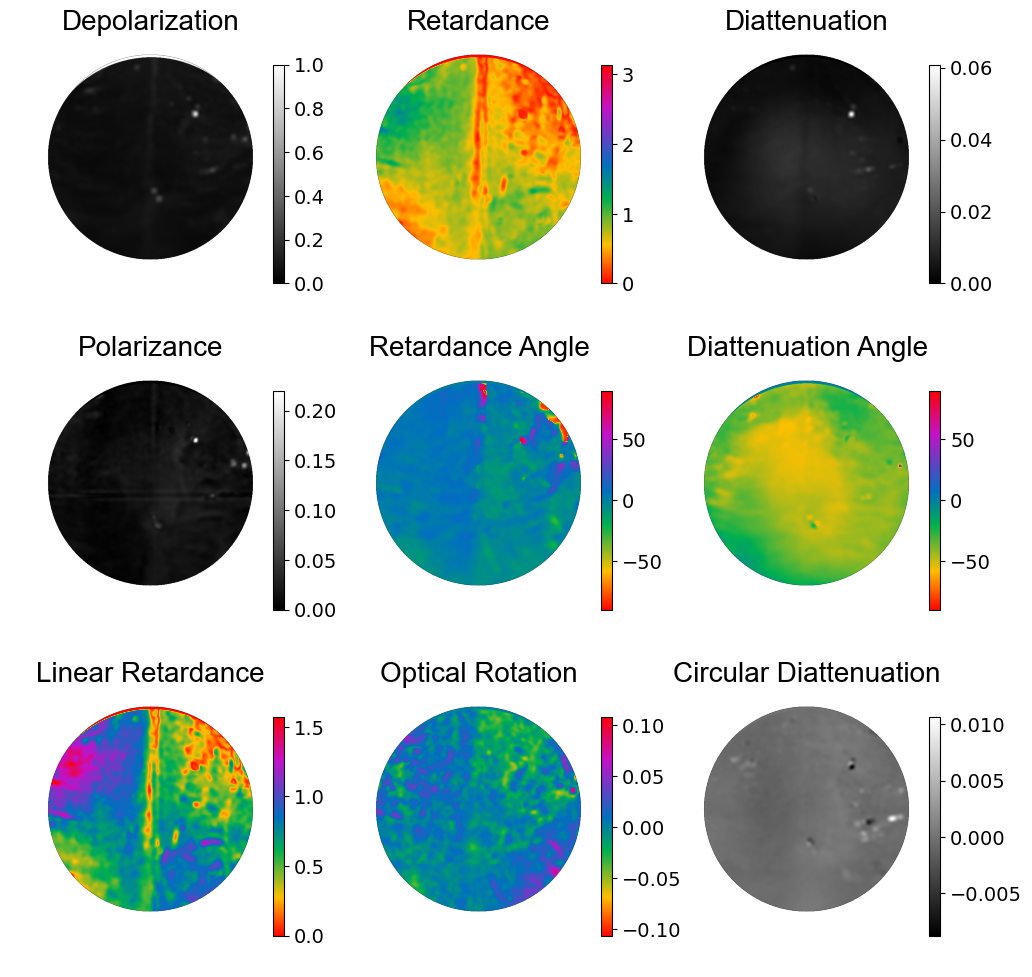

()

In [9]:
#Alternative way to visualize all parameters given by lu chipman from one wavelength-

circle=np.zeros((1024,1024,4))
for i in range(1024):
    for j in range(1024):
        value=((460-i)**2+(510-j)**2)**0.5
        if value>310:
            for q in range(4):
                circle[i,j,q]=1

#Show all Params for one Wavelength-
def all_params_plot(wvlngth):

    #Shows resulting matricies
    #plt.figure(figsize=(20,20), dpi=2000)
    #Nine parameters lets try 3x3 to start-
    fig, axs = plt.subplots(3,3)
    fig.set_size_inches(12, 12)
    #fig.tight_layout()
    csfont = {'fontname':'Arial'}
    fsize=20

    axs[0, 0].set_title('Depolarization', fontsize = fsize, **csfont)
    axs[0, 1].set_title('Retardance', fontsize = fsize,**csfont)
    axs[0, 2].set_title('Diattenuation', fontsize = fsize,**csfont)
    
    axs[1, 0].set_title('Polarizance', fontsize = fsize, **csfont)
    axs[1, 1].set_title('Retardance Angle', fontsize = fsize,**csfont)
    axs[1, 2].set_title('Diattenuation Angle', fontsize = fsize,**csfont)
    
    axs[2, 0].set_title('Linear Retardance', fontsize = fsize, **csfont)
    axs[2, 1].set_title('Optical Rotation', fontsize = fsize,**csfont)
    axs[2, 2].set_title('Circular Diattenuation', fontsize = fsize,**csfont)
    
    sizefix=100
    sizefix2=-100
    img1 = deplist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
    img2 = retlist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]        
    img3 = dialist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
    img4 = pollist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
    img5 = ranglist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
    img6 = danglist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]        
    img7 = linretlist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
    img8 = optrotlist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
    img9 = cdlist[wvlngth][sizefix:sizefix2,sizefix:sizefix2]
        
    circlecut=circle[sizefix:sizefix2,sizefix:sizefix2]
    
    #First turning off ticks-
    for i in range(3):
        for j in range(3):
            axs[i,j].set_yticklabels([])
            axs[i,j].set_xticklabels([])
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].spines['bottom'].set_color('white')
            axs[i,j].spines['top'].set_color('white')
            axs[i,j].spines['left'].set_color('white')
            axs[i,j].spines['right'].set_color('white')
    tick_font_size = 14
    
    c1 = axs[0,0].imshow(img1,cmap='gray', vmin=0, vmax=1)
    axs[0,0].imshow(circlecut)
    cbar=plt.colorbar(c1,ax=axs[0,0],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    c2 = axs[0,1].imshow(img2, vmin=0, vmax=np.pi,cmap=mymap2)
    axs[0,1].imshow(circlecut)
    cbar=plt.colorbar(c2,ax=axs[0,1],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    c3 = axs[0,2].imshow(img3,cmap='gray')
    axs[0,2].imshow(circlecut)
    cbar=plt.colorbar(c3,ax=axs[0,2],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)

    c4 = axs[1,0].imshow(img4,cmap='gray', vmin=0, vmax=0.22)
    axs[1,0].imshow(circlecut)
    cbar=plt.colorbar(c4,ax=axs[1,0],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)

    #Converted from degrees to radians-
    c5 = axs[1,1].imshow(img5*180/np.pi,cmap=mymap2, vmin=-90, vmax=90)
    axs[1,1].imshow(circlecut)
    cbar=plt.colorbar(c5,ax=axs[1,1],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    c6 = axs[1,2].imshow(img6*180/np.pi,cmap=mymap2)
    axs[1,2].imshow(circlecut)
    cbar=plt.colorbar(c6,ax=axs[1,2],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    c7 = axs[2,0].imshow(img7, cmap=mymap2, vmin=0, vmax=np.pi/2)
    axs[2,0].imshow(circlecut)
    cbar=plt.colorbar(c7,ax=axs[2,0],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    c8 = axs[2,1].imshow(img8, cmap=mymap2)
    axs[2,1].imshow(circlecut)
    cbar=plt.colorbar(c8,ax=axs[2,1],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)

    c9 = axs[2,2].imshow(img9,cmap='gray')
    axs[2,2].imshow(circlecut)
    cbar=plt.colorbar(c9,ax=axs[2,2],fraction=0.04, pad=-0.05)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    plt.show()
    
    return()


#Newfnc with all params displayed from just one wavelength-
#Wavelength index on list-
all_params_plot(0)


1.5362765012867772
-1.5343807172820114
1.5618000647190466
-1.5485023603534094
1.560197814322511
-1.5481155175285473
1.5627464577440078
-1.5666002843298235
1.5650639664612855
-1.5202419812241912


<Figure size 640x480 with 0 Axes>

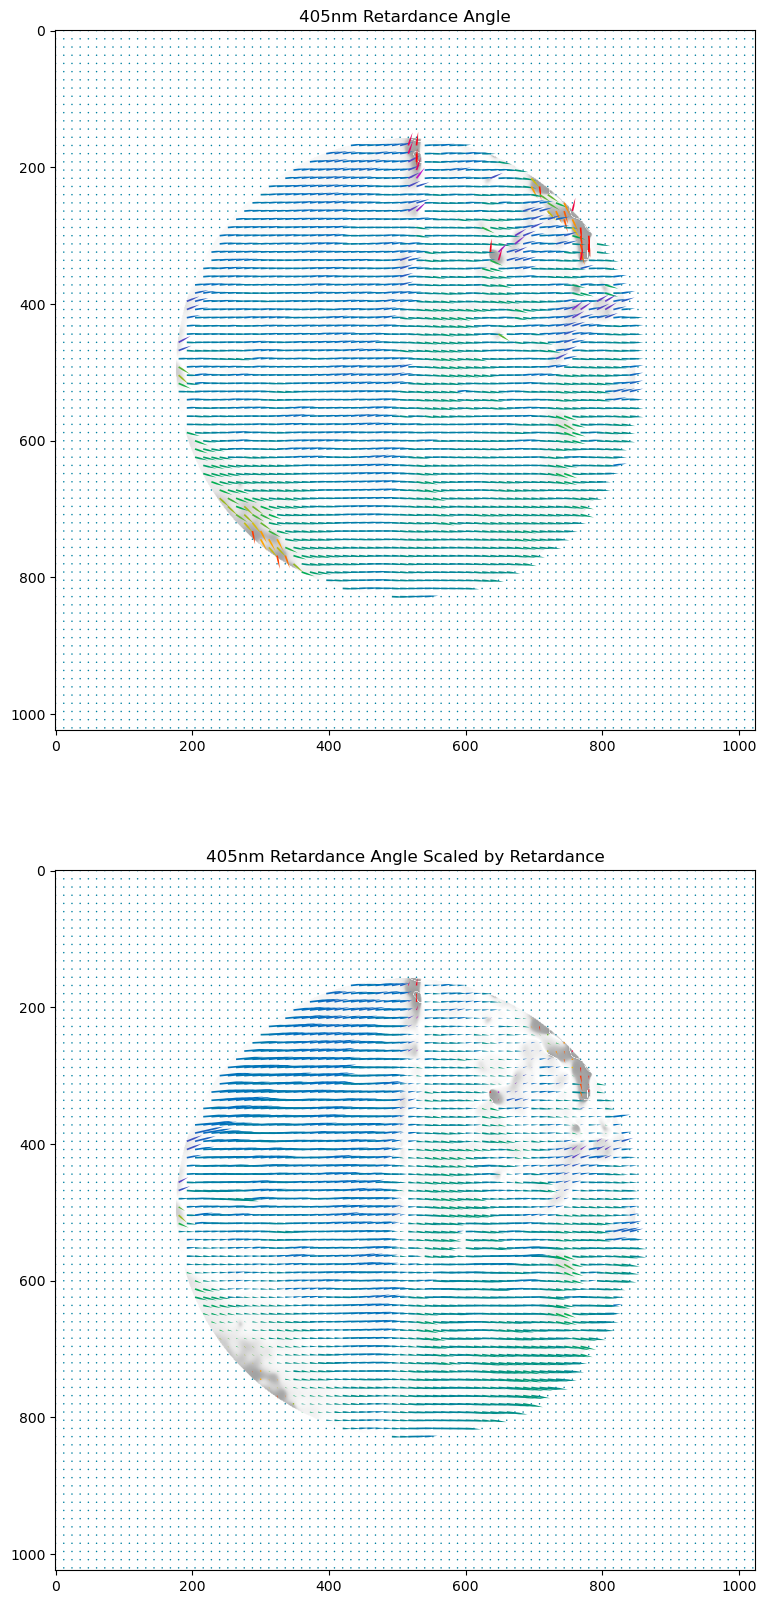

<Figure size 640x480 with 0 Axes>

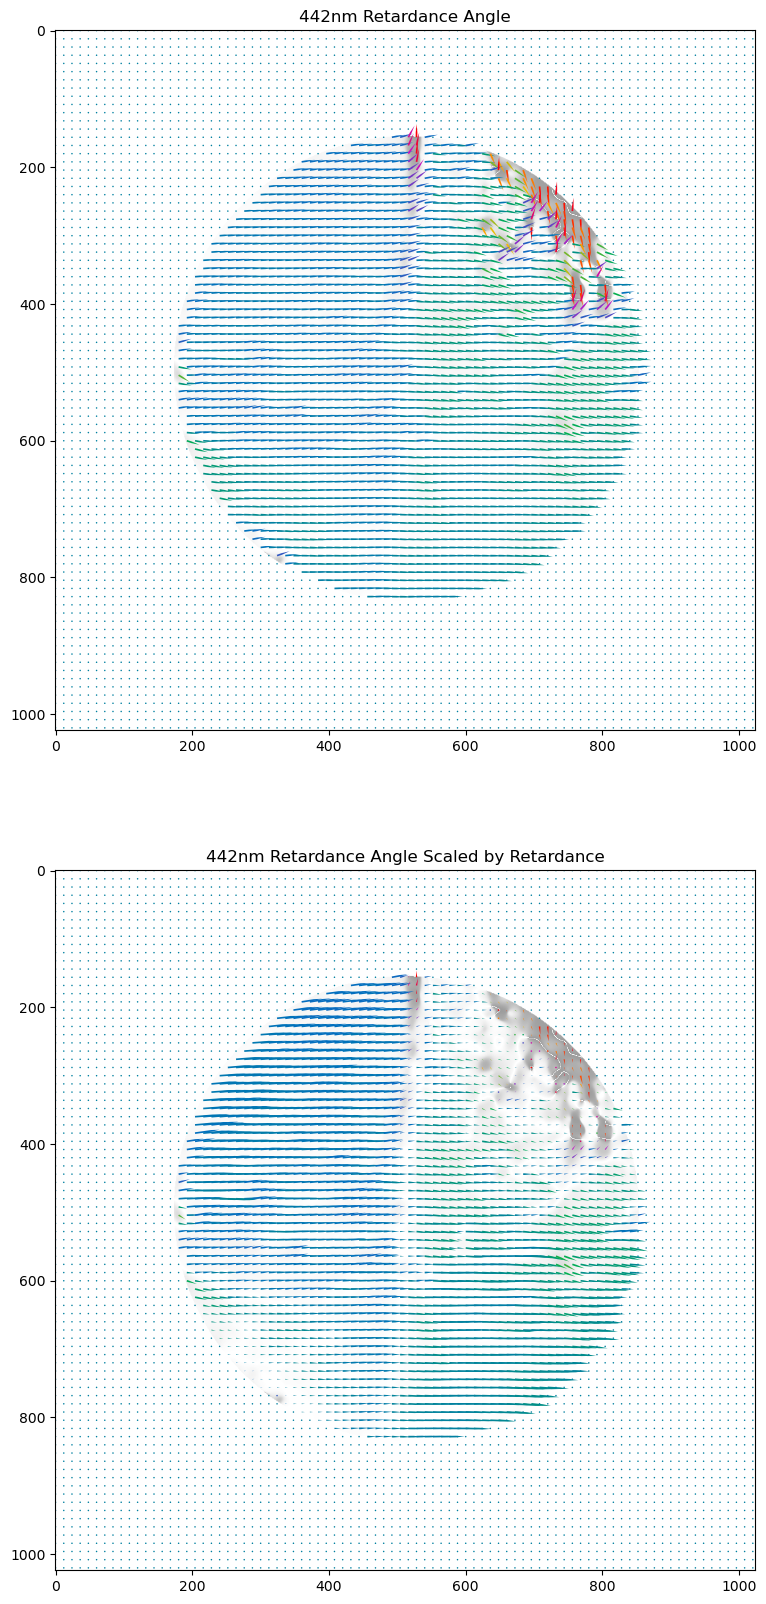

<Figure size 640x480 with 0 Axes>

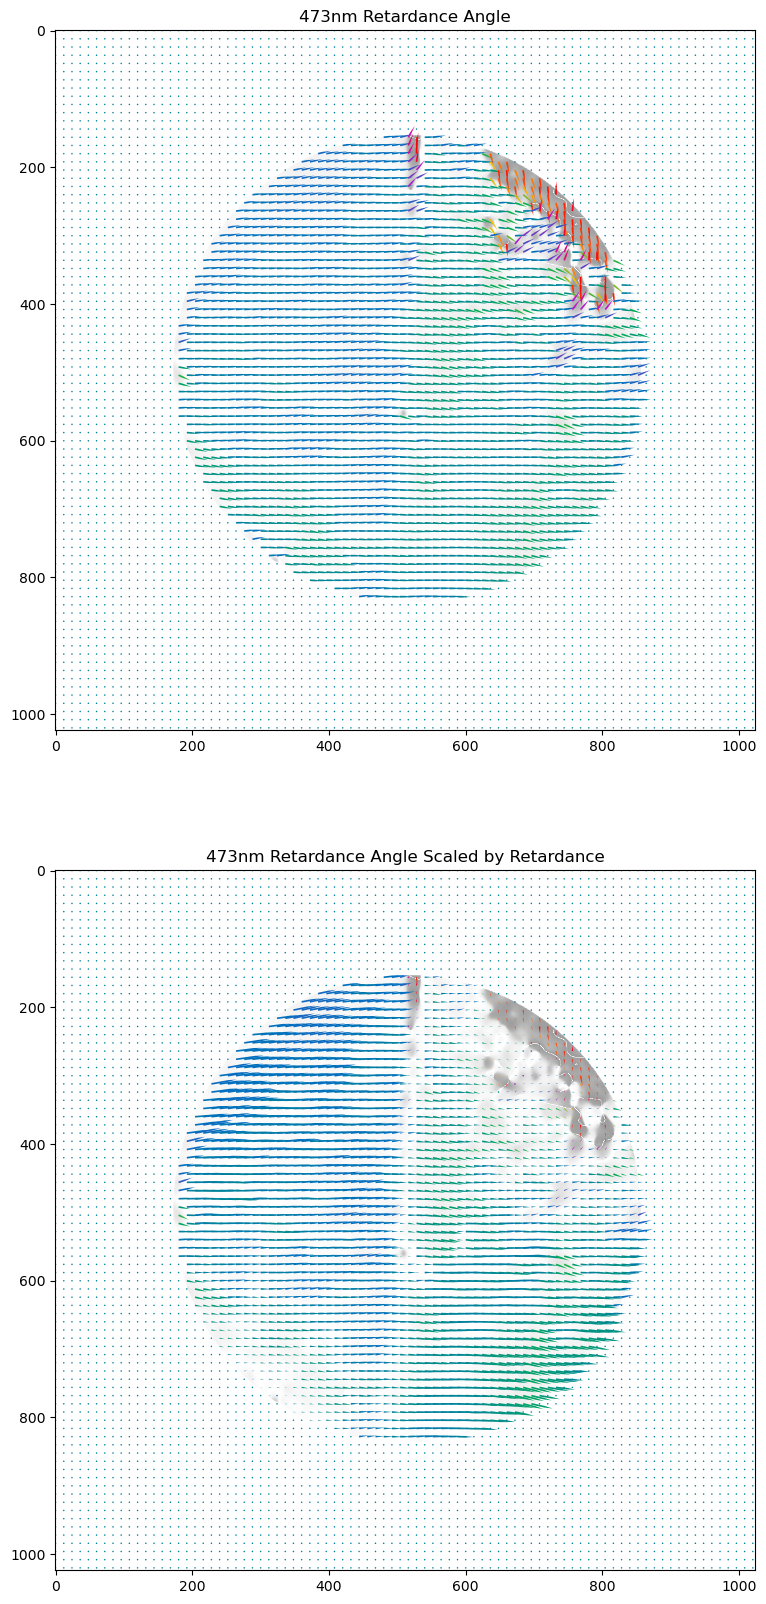

<Figure size 640x480 with 0 Axes>

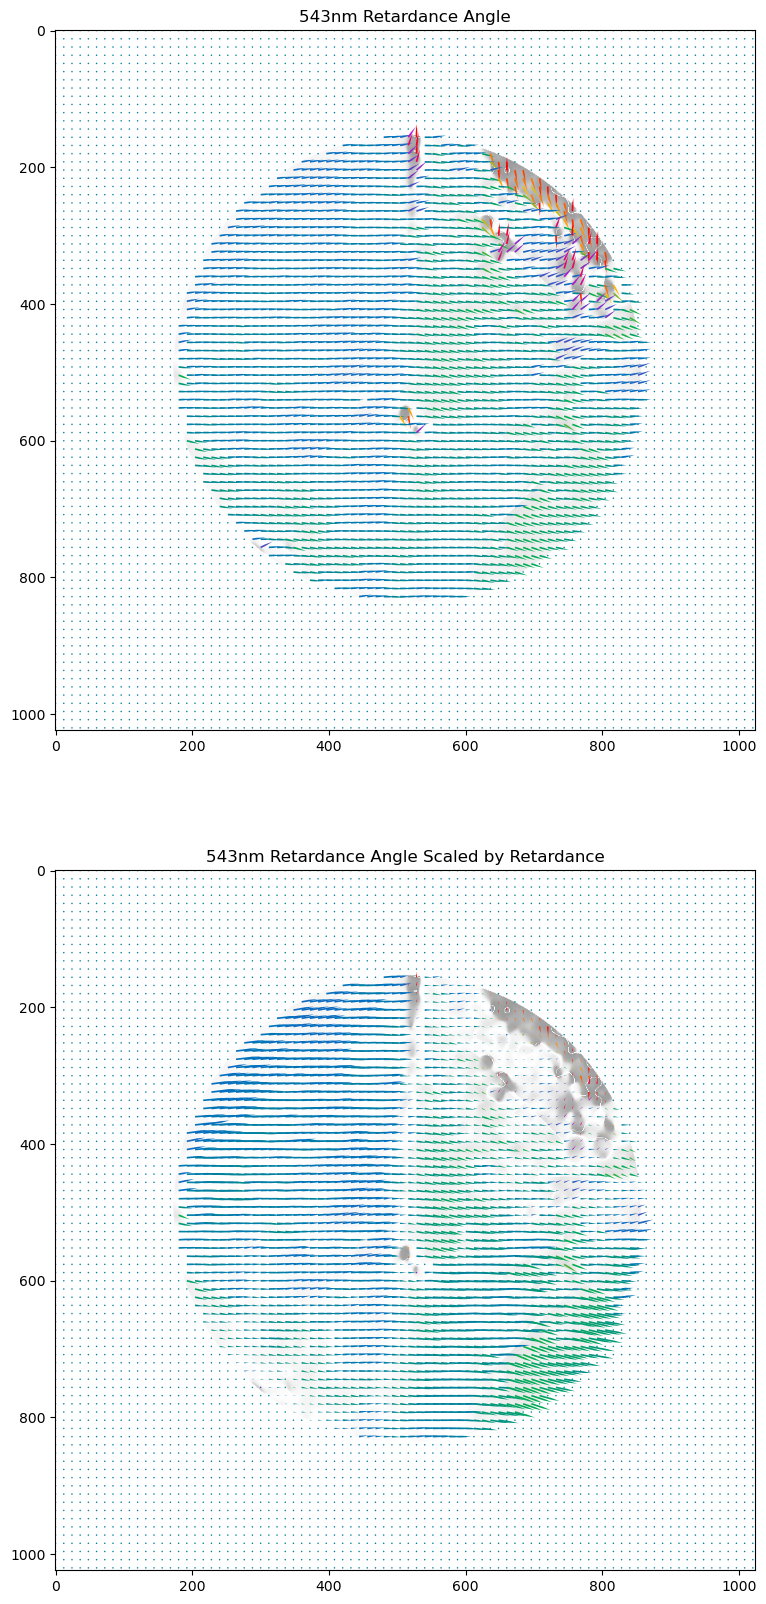

<Figure size 640x480 with 0 Axes>

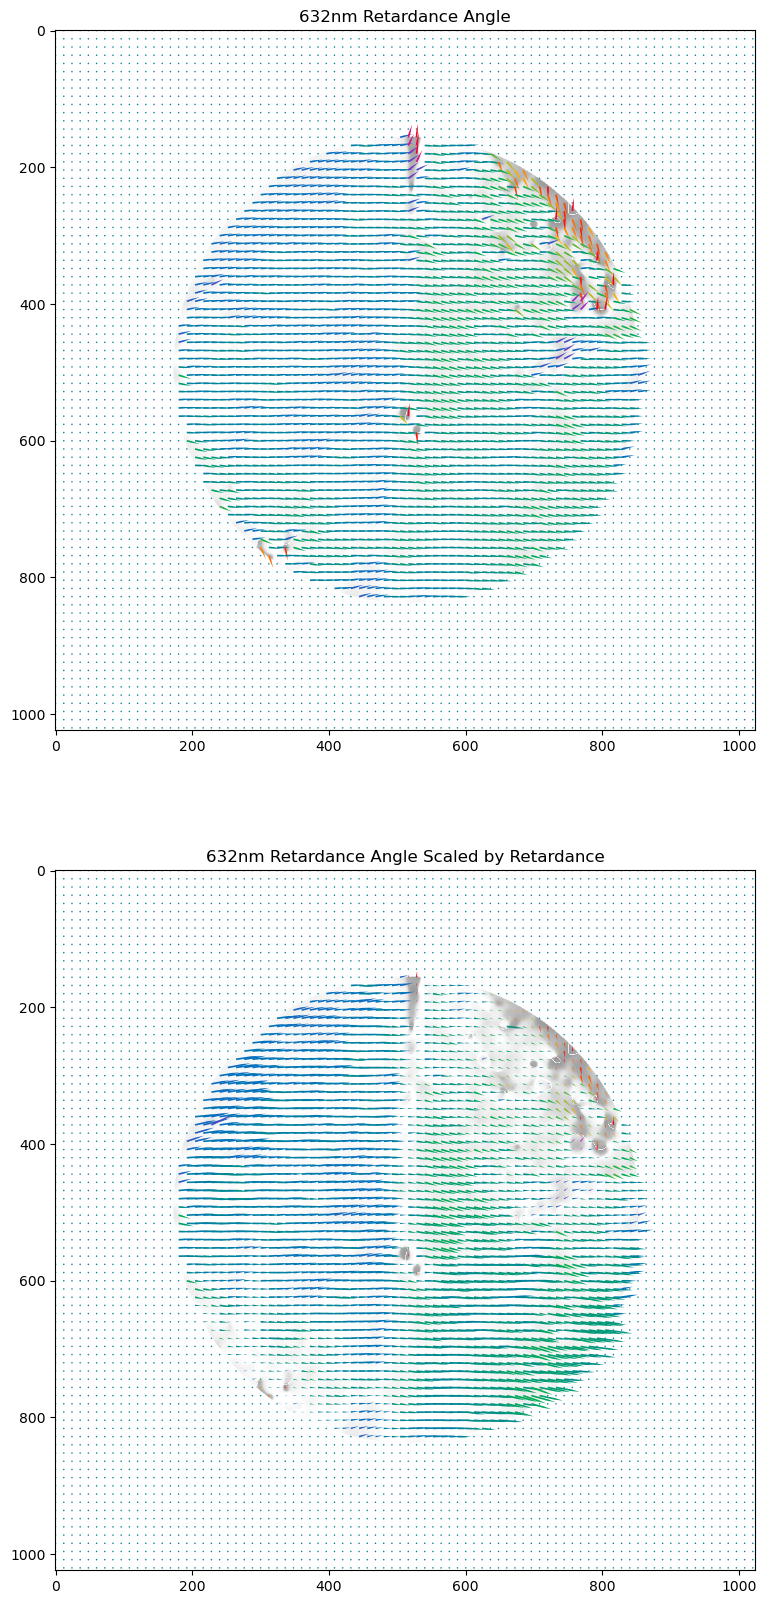

In [10]:
# Angle Vector Maps-

# newmap=np.zeros((256, 4))
# for i in range (256):
# #    newmap[i,:]=np.array([(256-i)/256, 0, i/256, 1])
#     newmap[i,:]=np.array([i/256, 0, (256-i)/256, 1])
    
# newcmp = mcolors.ListedColormap(newmap)
mymap2 = mcolors.ListedColormap(newmap)
#mymap2 = mcolors.LinearSegmentedColormap.from_list("number7", newmap)
#mymap2 = plt.cm.hsv 
# cmap_settings = ('RdBu', None)
# mymap = symmetrical_colormap(newcmp, new_name =None )

newgreys=np.zeros((100, 4))
for i in range (100):
    newgreys[i,:]=np.array([(256-i)/256, (256-i)/256, (256-i)/256, 1])

newgreym = mcolors.ListedColormap(newgreys)
cmap_settings = ('RdBu', None)
newgreysm = symmetrical_colormap(newgreym, new_name =None )


wvlist=["405","442","473","543","632"]
#Scaled by ret value-
for i in range(5):
    rang=ranglist[i]
    ret=retlist[i]

    if rang.shape[0]>100:
        wv=wvlist[i]

        X, Y = np.meshgrid(np.arange(0, rang.shape[0], 12), np.arange(0, rang.shape[1], 12))

        U2=np.cos(rang[Y,X])
        V2=np.sin(rang[Y,X])
        U2=np.where(rang[Y,X]==0, 0, U2)
        V2=np.where(rang[Y,X]==0,0,V2)

        U2s=0.1*np.cos(rang[Y,X])*((ret[Y,X]+0.01)/np.max(ret))
        V2s=0.1*np.sin(rang[Y,X])*((ret[Y,X]+0.01)/np.max(ret))
        U2s=np.where(rang[Y,X]==0, 0, U2s)
        V2s=np.where(rang[Y,X]==0,0,V2s)

#         c2 = np.arctan2(V2,np.abs(U2))
        c2 = np.arctan2(V2,U2)
        print(np.max(c2))
        print(np.min(c2))
        c2= (c2.ravel() - c2.min()) / c2.ptp()
        c2 = mymap2(c2)


        plt.figure()
        fig, ax = plt.subplots(2,1,  figsize=(20,20))

        ax[0].set_title(wv+'nm Retardance Angle')
        bg2=ax[0].imshow(rang, cmap=newgreysm)
        ax[0].quiver(X, Y, U2, V2, color=c2, headwidth=1, units='width')
        #ax[0].imshow(circle)

        ax[1].set_title(wv+'nm Retardance Angle Scaled by Retardance')
        bg2=ax[1].imshow(rang, cmap=newgreysm)
        ax[1].quiver(X, Y, U2s, V2s, color=c2, headwidth=1, units='width')
        #ax[1].imshow(circle)
        
        


# ROI analysis-

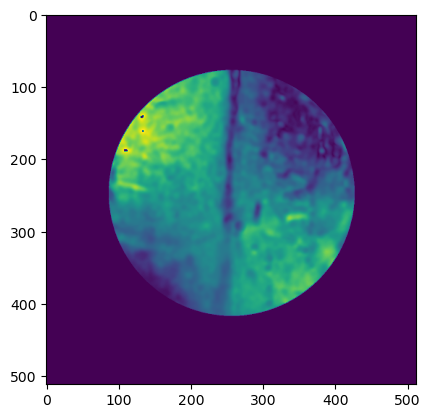

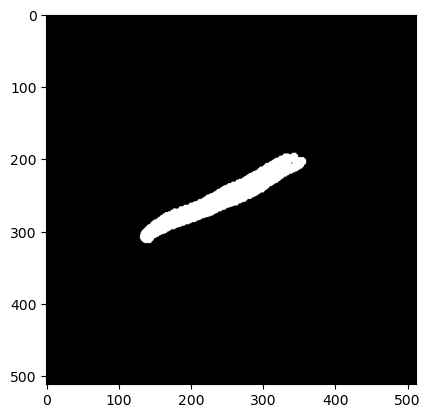

In [15]:
#Function to Draw Masks-
#Draw Mask to be saved to data folder if desired, masks can also be loaded directly in the next cell-

def paint(event):
    x1, y1 = (event.x - 5), (event.y - 5)
    x2, y2 = (event.x + 5), (event.y +5)
    canvas.create_oval(x1, y1, x2, y2, fill="white",width=6)
    draw.ellipse([x1, y1, x2, y2],fill="white",width=10)



def get_timestamp():
    date_time = datetime.now()
    # convert timestamp to string in dd-mm-yyyy HH:MM:SS
    str_date_time = date_time.strftime("%Y_%m_%d-%H_%M_%S")
    return(str_date_time)


#Save file, defined here so that the datafolder has already been defined-

#Check if datafolder already has mask folder and if not make one-
maskdatapath = os.path.join(data_folder, "masks") 
if os.path.exists(maskdatapath)==False:
    os.makedirs(maskdatapath)

#Masks will overwrite eachother with the name testmask until the next block of code is run
def save():
    filename=os.path.join(maskdatapath, "testmask.png") 
    plt.imshow(output_image)
    plt.show()
    output_image.save(filename)

#Put depolarization imafe in the correct format so it can be used as a reference-
maskref=cv2.resize(retlist[1],(512,512))
maskref = (np.abs(maskref)/(np.pi/2) * 255).astype(np.uint8)
#np.where(maskref>255,255,maskref)
image1=Image.fromarray(maskref)
plt.imshow(image1)
plt.show()

width = 512 # canvas width
height = 512 # canvas height
center = height//2
white = (255, 255, 255) # canvas back
black=(0,0,0)

master = Tk()
image =  ImageTk.PhotoImage(image1) 
# create a tkinter canvas to draw on
canvas = Canvas(width=width, height=height, bg='white')
canvas.create_image(256,256, image = image)
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), black)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()


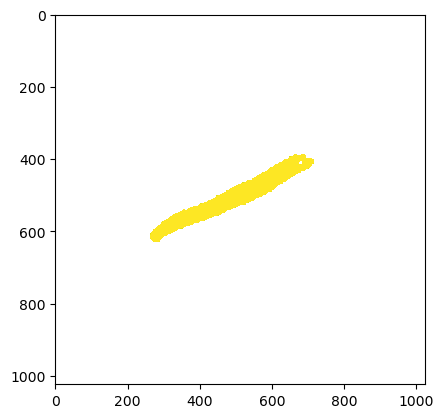

In [16]:
#Mask to be loaded, note if there's a newly drawn mask in the folder that will be used instead-
prexistingmaskpath=r"Q:\BOOM\PLIFerretStudy\2022_2023_Studies\PLIPhantom_Data\Fibers_tilted\Hair2\20230125_1431_05xM_hair_9washer\masks\mask2023_05_05-00_10_31.png"
#Check if there is a newly drawn mask-
drawnmaskpath=os.path.join(maskdatapath, "testmask.png")
if os.path.exists(drawnmaskpath):
    #Load testmask and rename is with a timestamp-
    time=get_timestamp()
    maskpath=os.path.join(maskdatapath, "mask" + time +".png")
    os.rename(drawnmaskpath,os.path.join(maskdatapath, maskpath)) 
else:
    maskpath=prexistingmaskpath
    
mask=np.asarray(Image.open(maskpath))
#Standardizing Mask
mask=mask/np.max(mask)-np.min(mask)
if mask.shape[0]>mask.shape[1]:
    sqmask=mask[:mask.shape[1], :]
else:
    sqmask=mask[:,:mask.shape[0]]
mask=np.abs(cv2.resize(sqmask[:,:,1],(1024,1024)))
mask=np.where(mask>0.5,mask,np.nan)
plt.imshow(mask)
#plt.imshow(datalist[1][1], alpha=0.5)
plt.show()



<Figure size 40000x10000 with 0 Axes>

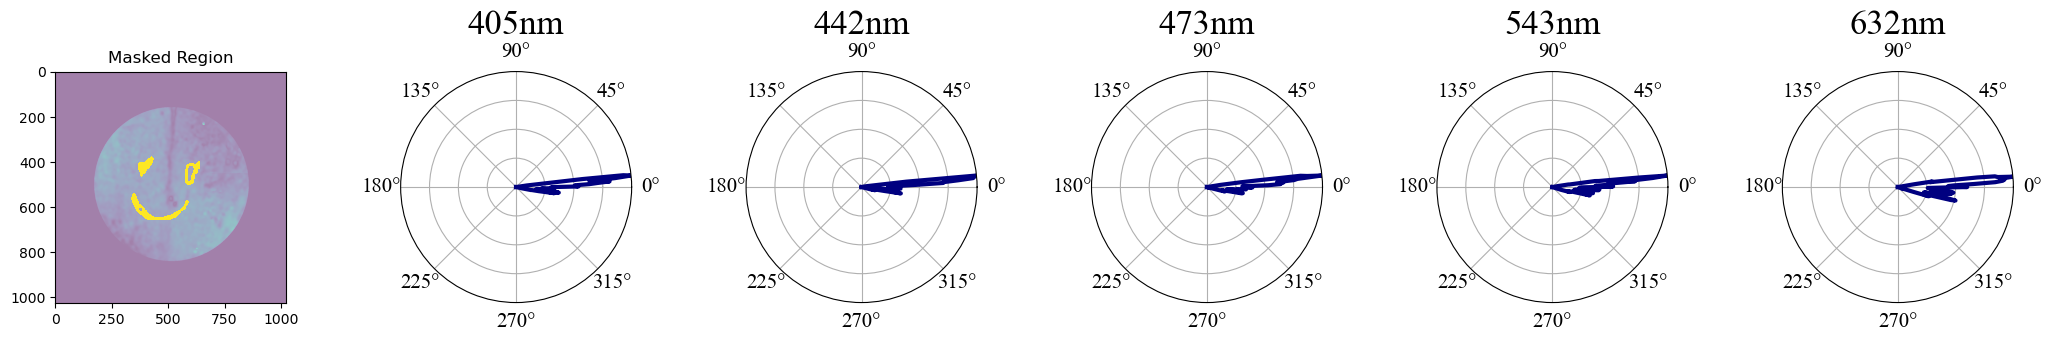

In [14]:
#Polar Plots of ROI-

##Draws Polar Plots for ROI over each wavelength

plt.figure(figsize=(20,5), dpi=2000)

fig = plt.figure()
fig.set_size_inches(26, 3)

ax1 = plt.subplot(161)
ax2 = plt.subplot(162, projection='polar')
ax3 = plt.subplot(163, projection='polar')
ax4 = plt.subplot(164, projection='polar')
ax5 = plt.subplot(165, projection='polar')
ax6 = plt.subplot(166, projection='polar')

ax1.set_title('Masked Region')
ax2.set_title('405nm',font="Times New Roman",fontsize='25')
ax3.set_title('442nm',font="Times New Roman",fontsize='25')
ax4.set_title('473nm',font="Times New Roman",fontsize='25')
ax5.set_title('543nm',font="Times New Roman",fontsize='25')
ax6.set_title('632nm',font="Times New Roman",fontsize='25')

ax1.imshow(retlist[4], alpha=0.5)
ax1.imshow(mask)
axlist=[ax2,ax3,ax4,ax5,ax6]


#Polar Plots of Angles for each wavelength-
for i in range(5):
    ret_angle=ranglist[i]
    ROI=ret_angle*mask
    #Angular range-
    theta = np.linspace(-np.pi/2,np.pi/2, 315)
    #Sort data into bins spanning the angular space-
    r=np.zeros(theta.shape[0])
    r=np.histogram(ROI, bins=315, range=(-np.pi/2,np.pi/2))[0]

    #Normalize-
    r=r/np.max(r)
    axlist[i].set_yticklabels([])
    axlist[i].set_theta_zero_location("E")
    axlist[i].plot(theta,r,c='navy', lw=3)
    axlist[i].set_rmax(1)
    axlist[i].set_rticks([0.25,0.5,0.75])  # Less radial ticks
    axlist[i].tick_params(labelsize=5)
    axlist[i].set_rlabel_position(90)  # Move radial labels away from plotted line
    axlist[i].grid(True)
    axlist[i].set_thetagrids(np.linspace(0,315,8),font="Times New Roman",fontsize='15')

plt.show()
    

In [17]:
def Straighten_up(mask,data, diff_angle):
    #diff_angle=np.arctan((y2-y)/(x-x2))* 180 / math.pi
    #rot_angle=np.sign(diff_angle)*(90-abs(diff_angle))
    rot_angle=diff_angle
    zeromask=np.where(np.isnan(mask),0,mask)
    zeromaskrot=ndimage.rotate(zeromask, rot_angle, reshape=False)
    maskrot=np.where(zeromaskrot<0.00001,np.nan,zeromaskrot)

    datarot=ndimage.rotate(data, rot_angle, reshape=False)
    #Show rotated mask and image-
#     plt.imshow(datarot)
#     plt.imshow(maskrot)
#     plt.show()
    
    return(maskrot,datarot,maskrot*datarot)

0
length (460,)
1
length (460,)
2


C:\Users\justinamb\AppData\Local\Temp\ipykernel_9512\2738708715.py:36: RuntimeWarning: Mean of empty slice
  onedrep=np.nanmean(ROI, axis=0)


length (460,)
3
length (460,)
4
length (460,)


<Figure size 40000x40000 with 0 Axes>

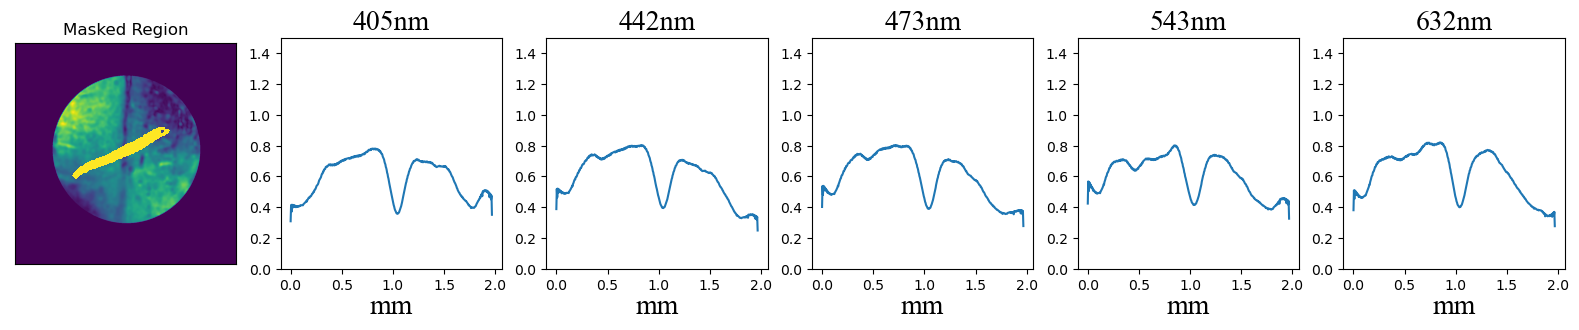

In [18]:
onedrep_sublist=[]

plt.figure(figsize=(20,20), dpi=2000)
fig, axs = plt.subplots(1,6)
fig.set_size_inches(20, 3)

axs[0].set_title('Masked Region')
axs[1].set_title('405nm', font="Times New Roman", fontsize="20")
axs[2].set_title('442nm', font="Times New Roman", fontsize="20")
axs[3].set_title('473nm', font="Times New Roman", fontsize="20")
axs[4].set_title('543nm', font="Times New Roman", fontsize="20")
axs[5].set_title('632nm', font="Times New Roman", fontsize="20")

axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].set_xticks([])
axs[0].set_yticks([])

showdata=retlist[1]
axs[0].imshow(showdata)
axs[0].imshow(mask)

meanlist=[]
totmeanlist=[]
for i in range(5):
    #Select data of interest-
    data_up=retlist[i]
    if data_up.shape[0]>100:
        print(i)
        data_up=gaussian_filter(data_up, sigma=10)
        #This function plots the mean of the ROI along the vertical- need to rotate if Mask is drawn at a diagonal-
        #Kind of a trial and error situatiion, honestly not my best code writing lol
        #mask_rot,data_up_rot,ROI_rot=Straighten_up(mask, data_up,12)
#Change this to mask_rot if you want to rotate the data-
        ROI=mask*data_up
        onedrep=np.nanmean(ROI, axis=0) 
        nonaners = onedrep[~np.isnan(onedrep)]
        #Convert Pixels to millimeters- 
        xmm=np.arange(nonaners.shape[0])*0.00428571
        print("length",nonaners.shape)
        onedrep_sublist.append([data_folder,onedrep[50:-50]])
        axs[i+1].plot(xmm,nonaners)
        axs[i+1].set_ylim([0,1.5])
        axs[i+1].set_xlabel('mm',labelpad=1, font="Times New Roman", fontsize="20")   
    else:
        axs[i+1].plot(np.ones(100))
plt.show()
